# Stage 4b: The Sun (Coronagraph)

A very important part of our Solar System is the Sun itself. It is for this reason that we, as its residents, have many observatories, both ground and space-based, that take measurements related to it and its influence.



1.   Installing the relevant modules
2.   Fetching Images from current spacecraft
3.   Plotting them
4.   Making a video in Python (intro)

## Installing the relevant modules

The first step here will be to get a module installed inside the jupyter notebook. To do that, just **run the following line the first time you open this notebook:**

In [1]:
!pip install -q sunpy[all] astropy  # This package is used for all things Sun-related, hosted in github: https://github.com/sunpy/sunpy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 33.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 35.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 54.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 76.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.2/101.2 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.6/72.6 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.8/71.8 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.6/195.6 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.3/198.3 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

**After the installation is finished, click on Runtime and Restart the Runtime with Control + M!**

In [2]:
from sunpy.net import Fido, attrs as a
from astropy import units as u

from datetime import datetime   # Python's small Time module

Inst = 'LASCO'
Detect = 'C3' # Here we will use the LASCO coronalgraph
# It is onboard the SOHO mission.
#Provides us with images of the Sun almost 24-7!


# Now choose the period we would like to get our data from. Please don't do too much at once!

start_time = datetime(2012,8,31,18,0)  # Year,Month,Day,Hour,Minute
end_time = datetime(2012,8,31,23,59)

samplerate_hours = 6 * u.minute  # We need to give our images a cadence for collection.
# Please keep in mind that aia takes an image in all of its wavelengths every 10 seconds or so.
# Choose a cadence depending on what you want to bring out!


#fido = Fido.search(a.Time(start=start_time, end=end_time), a.Instrument(Inst), a.vso.Sample(samplerate_hours))

fido = Fido.search(a.Time(start=start_time, end=end_time), a.Instrument(Inst), a. Detector(Detect), a.Sample(samplerate_hours))

print(fido)

Results from 1 Provider:

30 Results from the VSOClient:
Source: http://vso.stanford.edu/cgi-bin/search
Total estimated size: 59.058 Mbyte

       Start Time               End Time        Source ... Extent Type   Size 
                                                       ...              Mibyte
----------------------- ----------------------- ------ ... ----------- -------
2012-08-31 18:06:06.000 2012-08-31 18:06:25.000   SOHO ...      CORONA 2.01074
2012-08-31 18:18:06.000 2012-08-31 18:18:25.000   SOHO ...      CORONA 2.01074
2012-08-31 18:30:05.000 2012-08-31 18:30:24.000   SOHO ...      CORONA 2.01074
2012-08-31 18:42:05.000 2012-08-31 18:42:24.000   SOHO ...      CORONA 2.01074
2012-08-31 18:54:05.000 2012-08-31 18:54:25.000   SOHO ...      CORONA 2.01074
2012-08-31 19:06:06.000 2012-08-31 19:06:25.000   SOHO ...      CORONA 2.01074
2012-08-31 19:18:05.000 2012-08-31 19:18:24.000   SOHO ...      CORONA 2.01074
2012-08-31 19:30:05.000 2012-08-31 19:30:24.000   SOHO ...      CORONA

Now, we should have a series of results showing above this text-box. These are available records that we may now download:

In [3]:
from os import makedirs as newdir

dir_images = 'LASCO_data'
newdir(dir_images, exist_ok = True)

Fido.fetch(fido, path = 'LASCO_data/')

Files Downloaded:   0%|          | 0/30 [00:00<?, ?file/s]

32310944.fts:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

32310941.fts:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

32310943.fts:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

32310942.fts:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

32310945.fts:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

32310946.fts:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

32310947.fts:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

32310949.fts:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

32310948.fts:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

32310950.fts:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

32310951.fts:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

32310952.fts:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

32310954.fts:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

32310953.fts:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

32310955.fts:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

32310957.fts:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

32310956.fts:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

32310958.fts:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

32310960.fts:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

32310961.fts:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

32310959.fts:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

32310962.fts:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

32310963.fts:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

32310964.fts:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

32310965.fts:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

32310966.fts:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

32310967.fts:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

32310968.fts:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

32310969.fts:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

32310970.fts:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

['LASCO_data/32310941.fts', 'LASCO_data/32310942.fts', 'LASCO_data/32310943.fts', 'LASCO_data/32310944.fts', 'LASCO_data/32310945.fts', 'LASCO_data/32310946.fts', 'LASCO_data/32310947.fts', 'LASCO_data/32310948.fts', 'LASCO_data/32310949.fts', 'LASCO_data/32310950.fts', 'LASCO_data/32310951.fts', 'LASCO_data/32310952.fts', 'LASCO_data/32310953.fts', 'LASCO_data/32310954.fts', 'LASCO_data/32310955.fts', 'LASCO_data/32310956.fts', 'LASCO_data/32310957.fts', 'LASCO_data/32310958.fts', 'LASCO_data/32310959.fts', 'LASCO_data/32310960.fts', 'LASCO_data/32310961.fts', 'LASCO_data/32310962.fts', 'LASCO_data/32310963.fts', 'LASCO_data/32310964.fts', 'LASCO_data/32310965.fts', 'LASCO_data/32310966.fts', 'LASCO_data/32310967.fts', 'LASCO_data/32310968.fts', 'LASCO_data/32310969.fts', 'LASCO_data/32310970.fts']

##Looking at our newly acquired data

Now we need to access this data. For this we may use sunpy:

 [astropy.io.fits.verify]

INFO:sunpy:Missing metadata for solar radius: assuming the standard radius of the photosphere.
For frame 'heliographic_stonyhurst' the following metadata is missing: dsun_obs,hgln_obs,hglt_obs
For frame 'heliographic_carrington' the following metadata is missing: crlt_obs,dsun_obs,crln_obs
 [sunpy.map.mapbase]
For frame 'heliographic_stonyhurst' the following metadata is missing: dsun_obs,hgln_obs,hglt_obs
For frame 'heliographic_carrington' the following metadata is missing: crlt_obs,dsun_obs,crln_obs



INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


INFO:sunpy:Missing metadata for solar radius: assuming the standard radius of the photosphere.


INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


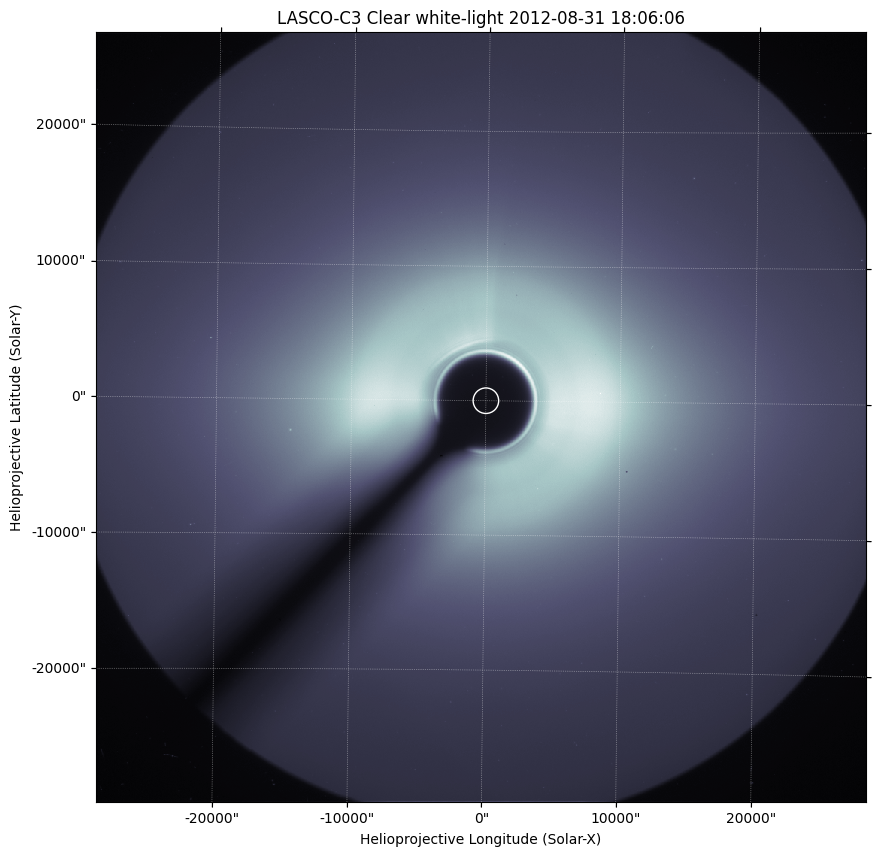

In [4]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import sunpy.map
import glob  # To fetch all files from a directory

map_list = sorted(glob.glob('LASCO_data/*.fts'))

lasco_map = sunpy.map.Map(map_list[0])

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection=lasco_map)
lasco_map.plot(axes=ax, cmap = plt.get_cmap('soholasco3'))
lasco_map.draw_limb()
plt.show()

Observatory,SOHO
Instrument,LASCO
Detector,C3
Measurement,white-light
Wavelength,Unknown
Observation Date,2012-08-31 18:06:06
Exposure Time,19.0928 s
Dimension,[1024. 1024.] pix
Coordinate System,helioprojective
Scale,[56. 56.] arcsec / pix
Reference Pixel,[518.2 532.5] pix

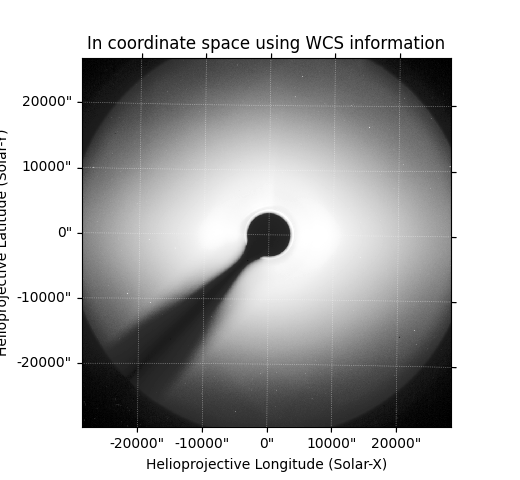
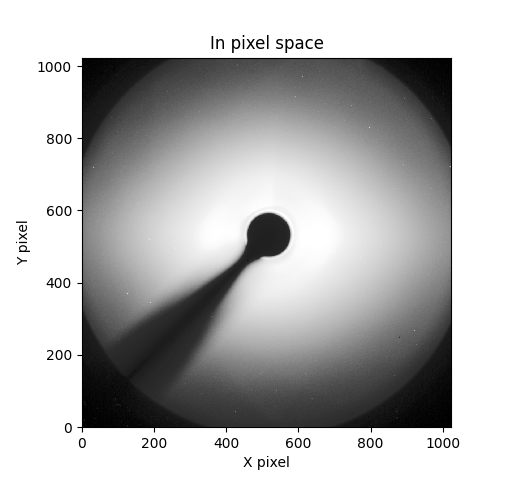
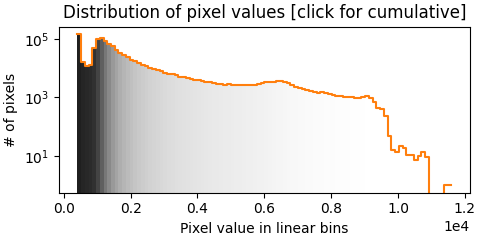
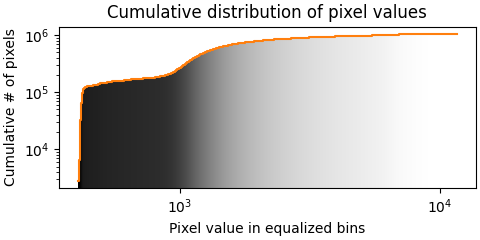

In [5]:
lasco_map #get the time of the map

As we have just seen, it is fairly straightforward to get images from a spacecraft into Python and show them, but what can we do once we have these images?

## Making videos out of our material

A first good use of these images is to study the dynamics of the solar atmosphere, known to affect spacecraft and the Earth's weather! To do that, we need to have a look at all of the images in rapid succession.

In [6]:
!pip install -q opencv-python

In [7]:
import cv2 # Here, we import OpenCV, a powerful image and video processing tool
from os import getcwd
import glob
from shutil import rmtree
from os import makedirs as newdir
from os import path

if path.exists('WEW_PythonWorkshop_Database/'): # You wouldn't need these two lines if you're plotting a different date!
    rmtree(path.join('WEW_PythonWorkshop_Database/'))

! git clone https://github.com/andyto1234/WEW_PythonWorkshop_Database.git # We're downloading data from github so it's quicker!

dir_png = 'WEW_PythonWorkshop_Database/LASCO_images'
img_array = []

for filename in sorted(glob.glob(f'{dir_png}/*.png')):
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)

out = cv2.VideoWriter('solar_vid_coronograph.mp4',cv2.VideoWriter_fourcc(*'mp4v'), 5, size)

for i in range(len(img_array)):
    out.write(img_array[i])

out.release()

Cloning into 'WEW_PythonWorkshop_Database'...
remote: Enumerating objects: 163, done.
remote: Total 163 (delta 0), reused 0 (delta 0), pack-reused 163
Receiving objects: 100% (163/163), 741.14 MiB | 28.22 MiB/s, done.
Resolving deltas: 100% (4/4), done.
Updating files: 100% (143/143), done.


With the above, we will have created a movie called "solar_vid_coronograph.mp4", which holds all of our images together.

## Can you choose a time where you can see the CME bubble clearly? There are multiple correct answers!